# Appendix B: Cable model code.

In [ ]:
# Importing & relevant modules
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import time 
from IPython.display import clear_output

# Calculating the results of Cable theory.
> Eq. 15 of Lecture Notes 3

In [ ]:
# Eq. 15 of the theory

'''
TODO:
* Define the lengths like L, and dx and then calculate the value of the array size for space.
'''

# Defining variables. These are the variables used in Eqn. 15 of LN3
Lambda = 45
R_Lam = 1
I_app = 2

E_l = -60

L = 1000
dx = 5

nx = round( L/dx )

V_theory = np.zeros( 2 * nx + 1 )

for i in range( -nx, nx + 1 ):

  #x = i * dx
  x = i * dx

  # Eqn. 15, LN3
  V_theory[nx + i] = E_l + ( ( I_app * R_Lam ) / 2 ) * math.exp( -abs( x ) / Lambda )





# Simulation of the diffusion equation.
> Eq. 9 of Lecture Notes 3 

In [ ]:
# Eq. 9, potential diffusion equation

'''
TODO:
* Define the lengths like L, and dx and then calculate the value of the array size for space.
'''

# Defining variables.
tau_l = 20
E_l = -60

'''
This Lambda is far too small.
Needs to be around 50 or 100.
'''
Lambda = 45

# Calculating time steps for the simulation
dt = 0.05
T = 600

nt = round(T/dt)

'''
Need to treat space like time.
dx should be bigger here too.
'''

L = 1000
dx = 5

nx = round( L/dx )

# Defining the simulation term.
V_sim = E_l * np.ones( ( 2 * nx + 1, nt ) )
V_sim[ nx + 1 ] = V_theory[ nx ]

for k in range( 1, nt ):

  # Calculating the diffusion term.
  # I have assumed no flux boundary conditions, Neumann boundary conditions. 
  
  # Eqn.9 can only be applied away from any injection points, hence the value of the theoretical voltage is
  # substituted here.
  V_sim[ nx + 1 , k - 1 ] = V_theory[ nx ]
  #V_sim[ nx + 1 , k - 1 ] = -45

  vv = np.concatenate( ( V_sim[0, k - 1], V_sim[ :, k - 1 ] ) , axis = None )
  vv = np.concatenate( ( vv, V_sim[ 2 * nx , k - 1 ] ) , axis = None )
    
  dVdx = np.diff( vv )/dx

  d2Vdx2 = np.diff( dVdx )/dx
 
  d2Vdx2[0], d2Vdx2[9] = 0, 0


  V_sim[:, k] = V_sim[:, k-1] + (dt / (tau_l)) * ( E_l * np.ones( 2 * nx + 1 ) - V_sim[:, k-1] + (Lambda ** 2) * d2Vdx2)



# Comparing the cable theory to the simulation.

Text(0.5, 1.0, 'Cable model of neuronal voltage')

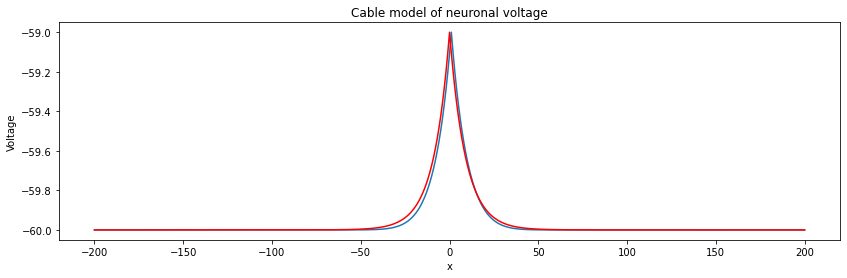

In [ ]:
'''
TODO:
'''

plt.figure(figsize=(14,4))
plt.plot( np.linspace(-nx, nx, 2 * nx + 1), V_sim[:, T ])
plt.plot( np.linspace(-nx, nx, 2 * nx + 1), V_theory, 'r-')
plt.xlabel("x")
plt.ylabel("Voltage")
plt.title("Cable model of neuronal voltage")


